In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
from pprint import pprint

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=True

In [2]:
# 加载数据
data = []
feature_method = ['CHI','IG','MI']
is_inter = ['False','True']
for f in feature_method:
    for inter in is_inter:
        data.append(np.load('./np_cluster_pro/np_{}_{}.npy'.format(f,inter)))

In [3]:
# 去除数据中的最后一列，获得用于聚类的数据
def split_data(data):
    return data[:,0:-1]


def standard_data(data):
    print('data:{}'.format(data.shape))
    scaler = StandardScaler()
    np1 = scaler.fit_transform(data[:,0:2])
    np2 = data[:,2:4]
    np3 = scaler.fit_transform(data[:,4:])
    ans = np.hstack((np1,np2,np3))
    print('scale_data:{}'.format(ans.shape))
    return ans

In [11]:
cluster_data = split_data(data[5])
cluster_data = standard_data(cluster_data)
cluster_data

data:(3205, 94)
scale_data:(3205, 94)


array([[-0.56105519, -0.02296705,  0.        , ..., -0.16365635,
        -0.17514016, -0.27968008],
       [ 0.28023885, -0.03630301,  0.        , ..., -0.16365635,
        -0.17514016, -0.27968008],
       [ 1.1215329 , -0.03708926,  0.        , ..., -0.16365635,
        -0.17514016, -0.0787893 ],
       ...,
       [-0.67322773, -0.02908359,  0.        , ..., -0.16365635,
        -0.17514016, -0.27968008],
       [-0.95365908, -0.02077196,  0.        , ..., -0.16365635,
        -0.17514016, -0.27968008],
       [-0.95365908,  0.00340954,  0.        , ...,  2.65201097,
         2.24151982,  0.12210148]])

In [16]:
model = SpectralClustering(n_clusters=5,affinity='nearest_neighbors',n_neighbors=100).fit(cluster_data)

In [29]:
sc=[]
ch=[]
db=[]
for k in range(2,25):
    model = SpectralClustering(n_clusters=k,affinity='nearest_neighbors',n_neighbors=100).fit(cluster_data)
    sc.append(silhouette_score(cluster_data,model.labels_))
    ch.append(calinski_harabasz_score(cluster_data,model.labels_))
    db.append(davies_bouldin_score(cluster_data,model.labels_))

In [30]:
pprint(ch)

[170.68267456649485,
 216.26253875304576,
 208.3178229292728,
 233.91013307904237,
 225.8578506055754,
 242.95248633491482,
 220.8176244195096,
 200.07017770656984,
 197.19308925059727,
 183.21179163521106,
 169.15284891524752,
 157.66768526414256,
 154.82109474473964,
 153.59883877792194,
 151.81224981340813,
 144.99295399120223,
 143.9104243539611,
 139.72074007547758,
 134.63410054877775,
 129.7842586428604,
 125.18831475949979,
 126.01793444517145,
 123.36312862771908]


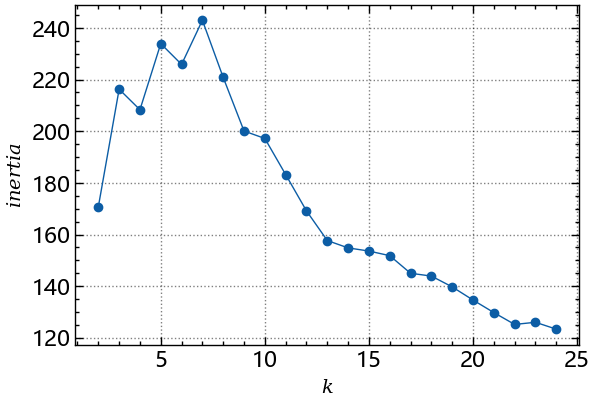

In [33]:
with plt.style.context(['science','grid','notebook']):
    fig= plt.figure(figsize=(6.5,4.5),dpi=100)
#     plt.xlim([0,14])
    plt.plot(range(2,25),ch,linewidth=1,marker='o')
    plt.xlabel(r'$k$',fontdict={'size':14})
    plt.ylabel(r'$inertia$',fontdict={'size':14})
    plt.show()

In [9]:
code = {
    0:'CHI(without Interpolation)',
    1:'CHI(with Interpolation)',
    2:'IG(without Interpolation)',
    3:'IG(with Interpolation)',
    4:'MI(without Interpolation)',
    5:'MI(with Interpolation)',
}
k_arr = [20,20,15,15,15,15]
score = {}
for idx,data_item in enumerate(data):
    print('-----{}-----'.format(idx))
    cluster_data = split_data(data_item)
    cluster_data = standard_data(cluster_data)
    print('cluster_data:{}'.format(cluster_data.shape))
    score[code[idx]] = {}
    model = SpectralClustering(n_clusters=k_arr[idx],affinity='nearest_neighbors').fit(cluster_data)
    score[code[idx]]['SC'] = silhouette_score(cluster_data,model.labels_)
    score[code[idx]]['CH'] = calinski_harabasz_score(cluster_data,model.labels_)
    score[code[idx]]['DB'] = davies_bouldin_score(cluster_data,model.labels_)

-----0-----
data:(3583, 94)
scale_data:(3583, 94)
cluster_data:(3583, 94)
-----1-----
data:(3583, 94)
scale_data:(3583, 94)
cluster_data:(3583, 94)
-----2-----
data:(3583, 94)
scale_data:(3583, 94)
cluster_data:(3583, 94)
-----3-----
data:(3583, 94)
scale_data:(3583, 94)
cluster_data:(3583, 94)
-----4-----
data:(3205, 94)
scale_data:(3205, 94)
cluster_data:(3205, 94)
-----5-----
data:(3205, 94)
scale_data:(3205, 94)
cluster_data:(3205, 94)


In [10]:
pprint(score)

{'CHI(with Interpolation)': {'CH': 85.49837364225978,
                             'DB': 1.8277407264369798,
                             'SC': 0.022449370483358533},
 'CHI(without Interpolation)': {'CH': 145.56507267880752,
                                'DB': 1.5922817022452898,
                                'SC': 0.060153734046728115},
 'IG(with Interpolation)': {'CH': 101.76036756366203,
                            'DB': 1.8687795370306495,
                            'SC': 0.06767458590595868},
 'IG(without Interpolation)': {'CH': 154.2726538385714,
                               'DB': 1.6433191866978585,
                               'SC': 0.04289721698360402},
 'MI(with Interpolation)': {'CH': 137.60832172119515,
                            'DB': 1.654700226935321,
                            'SC': 0.03800114881706888},
 'MI(without Interpolation)': {'CH': 205.10513132958957,
                               'DB': 1.6296725583284029,
                               'SC': 0.1092